<a href="https://colab.research.google.com/github/Katie-Moses/DSPS_KMoses/blob/main/HW7/KMoses_Kaggle_HappinessKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Task 1: make a kaggle account and set up your API (see below)

In [1]:
import json
import os

In [2]:
# this mounts your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# this gets you to your drive folder
os.chdir('/content/drive/MyDrive')
!ls kaggle.json
!chmod 600 kaggle.json
# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "9bc6db4ebeea75ce4ffa2abef5fcb051"#envs['key']

kaggle.json


In [4]:
!pip install kaggle

>Task 2: read in the data for the World Happniess Dataset https://www.kaggle.com/datasets/unsdsn/world-happiness/data

In [5]:
import kaggle
import pandas as pd

In [6]:
!kaggle datasets list -s "happiness"

ref                                                 title                                       size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
unsdsn/world-happiness                              World Happiness Report                     37692  2019-11-27 04:41:47.297000         369307       4408  0.85294116       
ajaypalsinghlo/world-happiness-report-2021          World Happiness Report 2021                56531  2021-03-22 16:51:01.373000          86527       1400  0.9705882        
PromptCloudHQ/world-happiness-report-2019           World Happiness Report 2019                 3629  2019-03-20 09:39:07.397000          25475        414  1.0              
sougatapramanick/happiness-index-2018-2019          Happiness Index 2018-2019                  15768  2023-04-14 12:01:03.437000  

In [7]:
!kaggle datasets download -d unsdsn/world-happiness

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip world-happiness.zip

Archive:  world-happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2015.csv                
replace 2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2016.csv                
replace 2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2017.csv                
replace 2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2018.csv                
replace 2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2019.csv                


In [9]:
happy_ds = pd.read_csv("2015.csv")
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


>Task 3: For each numerical column X, prepare a column that is a minmax version of X and a version that is the standardized version of X, store them in the same or another dataframe (your choice) as, for example X_minmax and X_standardized (choose the variable or dataframe names you want, but make them meaningful and descriptive!)

In [10]:
happy_ds["Family Minmax"] = happy_ds["Family"] - happy_ds["Family"].min()
happy_ds["Family Minmax"] = happy_ds["Family Minmax"] / happy_ds["Family Minmax"].max()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family Minmax
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.962403
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.000000
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.970297
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.949167
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.943219


In [11]:
happy_ds["Family Standard"] = (happy_ds["Family"] - happy_ds["Family"].mean())
happy_ds["Family Standard"] = happy_ds["Family Standard"] / happy_ds["Family Standard"].std()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family Minmax,Family Standard
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.962403,1.316097
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.000000,1.509658
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.970297,1.356740
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.949167,1.247954
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.943219,1.217334


In [12]:
happy_ds["Health Minmax"] = happy_ds["Health (Life Expectancy)"] - happy_ds["Health (Life Expectancy)"].min()
happy_ds["Health Minmax"] = happy_ds["Health Minmax"] / happy_ds["Health Minmax"].max()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family Minmax,Family Standard,Health Minmax
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.962403,1.316097,0.918244
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.000000,1.509658,0.924496
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.970297,1.356740,0.853099
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.949167,1.247954,0.863409
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.943219,1.217334,0.883326


In [13]:
happy_ds["Health Standard"] = (happy_ds["Health (Life Expectancy)"] - happy_ds["Health (Life Expectancy)"].mean())
happy_ds["Health Standard"] = happy_ds["Health Standard"] / happy_ds["Health Standard"].std()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family Minmax,Family Standard,Health Minmax,Health Standard
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.962403,1.316097,0.918244,1.259404
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.000000,1.509658,0.924496,1.285347
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.970297,1.356740,0.853099,0.989084
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.949167,1.247954,0.863409,1.031864
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.943219,1.217334,0.883326,1.114510


In [14]:
happy_ds["Freedom Minmax"] = happy_ds["Freedom"] - happy_ds["Freedom"].min()
happy_ds["Freedom Minmax"] = happy_ds["Freedom Minmax"] / happy_ds["Freedom Minmax"].max()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family Minmax,Family Standard,Health Minmax,Health Standard,Freedom Minmax
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.962403,1.316097,0.918244,1.259404,0.993789
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.000000,1.509658,0.924496,1.285347,0.938841
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.970297,1.356740,0.853099,0.989084,0.969615
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.949167,1.247954,0.863409,1.031864,1.000000
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.943219,1.217334,0.883326,1.114510,0.945112


In [15]:
happy_ds["Freedom Standard"] = (happy_ds["Freedom"] - happy_ds["Freedom"].mean())
happy_ds["Freedom Standard"] = happy_ds["Freedom Standard"] / happy_ds["Freedom Standard"].std()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family Minmax,Family Standard,Health Minmax,Health Standard,Freedom Minmax,Freedom Standard
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.962403,1.316097,0.918244,1.259404,0.993789,1.572438
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.000000,1.509658,0.924496,1.285347,0.938841,1.328233
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.970297,1.356740,0.853099,0.989084,0.969615,1.465001
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.949167,1.247954,0.863409,1.031864,1.000000,1.600044
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.943219,1.217334,0.883326,1.114510,0.945112,1.356104


In [16]:
happy_ds["Trust Minmax"] = happy_ds["Trust (Government Corruption)"] - happy_ds["Trust (Government Corruption)"].min()
happy_ds["Trust Minmax"] = happy_ds["Trust Minmax"] / happy_ds["Trust Minmax"].max()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family Minmax,Family Standard,Health Minmax,Health Standard,Freedom Minmax,Freedom Standard,Trust Minmax
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.962403,1.316097,0.918244,1.259404,0.993789,1.572438,0.760595
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.000000,1.509658,0.924496,1.285347,0.938841,1.328233,0.256292
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.970297,1.356740,0.853099,0.989084,0.969615,1.465001,0.876175
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.949167,1.247954,0.863409,1.031864,1.000000,1.600044,0.661394
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.943219,1.217334,0.883326,1.114510,0.945112,1.356104,0.597144


In [17]:
happy_ds["Trust Standard"] = (happy_ds["Trust (Government Corruption)"] - happy_ds["Trust (Government Corruption)"].mean())
happy_ds["Trust Standard"] = happy_ds["Trust Standard"] / happy_ds["Trust Standard"].std()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family Minmax,Family Standard,Health Minmax,Health Standard,Freedom Minmax,Freedom Standard,Trust Minmax,Trust Standard
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0.962403,1.316097,0.918244,1.259404,0.993789,1.572438,0.760595,2.302331
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1.000000,1.509658,0.924496,1.285347,0.938841,1.328233,0.256292,-0.016427
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0.970297,1.356740,0.853099,0.989084,0.969615,1.465001,0.876175,2.833763
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.949167,1.247954,0.863409,1.031864,1.000000,1.600044,0.661394,1.846210
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0.943219,1.217334,0.883326,1.114510,0.945112,1.356104,0.597144,1.550794


In [18]:
happy_ds["Generosity Minmax"] = happy_ds["Generosity"] - happy_ds["Generosity"].min()
happy_ds["Generosity Minmax"] = happy_ds["Generosity Minmax"] / happy_ds["Generosity Minmax"].max()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Dystopia Residual,Family Minmax,Family Standard,Health Minmax,Health Standard,Freedom Minmax,Freedom Standard,Trust Minmax,Trust Standard,Generosity Minmax
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,0.962403,1.316097,0.918244,1.259404,0.993789,1.572438,0.760595,2.302331,0.372895
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2.70201,1.000000,1.509658,0.924496,1.285347,0.938841,1.328233,0.256292,-0.016427,0.548198
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2.49204,0.970297,1.356740,0.853099,0.989084,0.969615,1.465001,0.876175,2.833763,0.428947
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2.46531,0.949167,1.247954,0.863409,1.031864,1.000000,1.600044,0.661394,1.846210,0.435983
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2.45176,0.943219,1.217334,0.883326,1.114510,0.945112,1.356104,0.597144,1.550794,0.575602


In [19]:
happy_ds["Generosity Standard"] = (happy_ds["Generosity"] - happy_ds["Generosity"].mean())
happy_ds["Generosity Standard"] = happy_ds["Generosity Standard"] / happy_ds["Generosity Standard"].std()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Family Minmax,Family Standard,Health Minmax,Health Standard,Freedom Minmax,Freedom Standard,Trust Minmax,Trust Standard,Generosity Minmax,Generosity Standard
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.962403,1.316097,0.918244,1.259404,0.993789,1.572438,0.760595,2.302331,0.372895,0.469547
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,1.000000,1.509658,0.924496,1.285347,0.938841,1.328233,0.256292,-0.016427,0.548198,1.570862
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.970297,1.356740,0.853099,0.989084,0.969615,1.465001,0.876175,2.833763,0.428947,0.821680
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.949167,1.247954,0.863409,1.031864,1.000000,1.600044,0.661394,1.846210,0.435983,0.865884
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.943219,1.217334,0.883326,1.114510,0.945112,1.356104,0.597144,1.550794,0.575602,1.743021


In [20]:
happy_ds["Dystopia Minmax"] = happy_ds["Dystopia Residual"] - happy_ds["Dystopia Residual"].min()
happy_ds["Dystopia Minmax"] = happy_ds["Dystopia Minmax"] / happy_ds["Dystopia Minmax"].max()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Family Standard,Health Minmax,Health Standard,Freedom Minmax,Freedom Standard,Trust Minmax,Trust Standard,Generosity Minmax,Generosity Standard,Dystopia Minmax
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,1.316097,0.918244,1.259404,0.993789,1.572438,0.760595,2.302331,0.372895,0.469547,0.668630
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,1.509658,0.924496,1.285347,0.938841,1.328233,0.256292,-0.016427,0.548198,1.570862,0.725030
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,1.356740,0.853099,0.989084,0.969615,1.465001,0.876175,2.833763,0.428947,0.821680,0.660889
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,1.247954,0.863409,1.031864,1.000000,1.600044,0.661394,1.846210,0.435983,0.865884,0.652724
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,1.217334,0.883326,1.114510,0.945112,1.356104,0.597144,1.550794,0.575602,1.743021,0.648584


In [21]:
happy_ds["Dystopia Standard"] = (happy_ds["Dystopia Residual"] - happy_ds["Dystopia Residual"].mean())
happy_ds["Dystopia Standard"] = happy_ds["Dystopia Standard"] / happy_ds["Dystopia Standard"].std()
happy_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Health Minmax,Health Standard,Freedom Minmax,Freedom Standard,Trust Minmax,Trust Standard,Generosity Minmax,Generosity Standard,Dystopia Minmax,Dystopia Standard
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.918244,1.259404,0.993789,1.572438,0.760595,2.302331,0.372895,0.469547,0.668630,0.755855
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.924496,1.285347,0.938841,1.328233,0.256292,-0.016427,0.548198,1.570862,0.725030,1.089393
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.853099,0.989084,0.969615,1.465001,0.876175,2.833763,0.428947,0.821680,0.660889,0.710077
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.863409,1.031864,1.000000,1.600044,0.661394,1.846210,0.435983,0.865884,0.652724,0.661789
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.883326,1.114510,0.945112,1.356104,0.597144,1.550794,0.575602,1.743021,0.648584,0.637311


It was at this point that Kat called it a night after actually making meaningful process, and started singing "Still Alive" from *Portal*.

"

This was a triumph

I'm making a note here, "Huge success"

It's hard to overstate my satisfaction

Data Science

We do what we must because we can

For the good of all of us, except the ones who are dead

But there's no sense crying over every mistake

You just keep on trying 'til you run out of cake

And the science gets done, and you make a neat gun

For the people who are still alive

...

Now those points of data will make some beautiful lines

And we're out of brain-dead, gonna finish on time

So I'm glad I got burned, gonna think of all the things I'll learn

For the people who are still alive

"

>Task 4: For each numerical column pair X and Y make a scatter plot of Y vs X with the data as is read in, a scatter plot of Y_minmax vs X_minmax, and a scatter plot of Y_standardized and X_standardized

In [22]:
import matplotlib.pyplot as plt

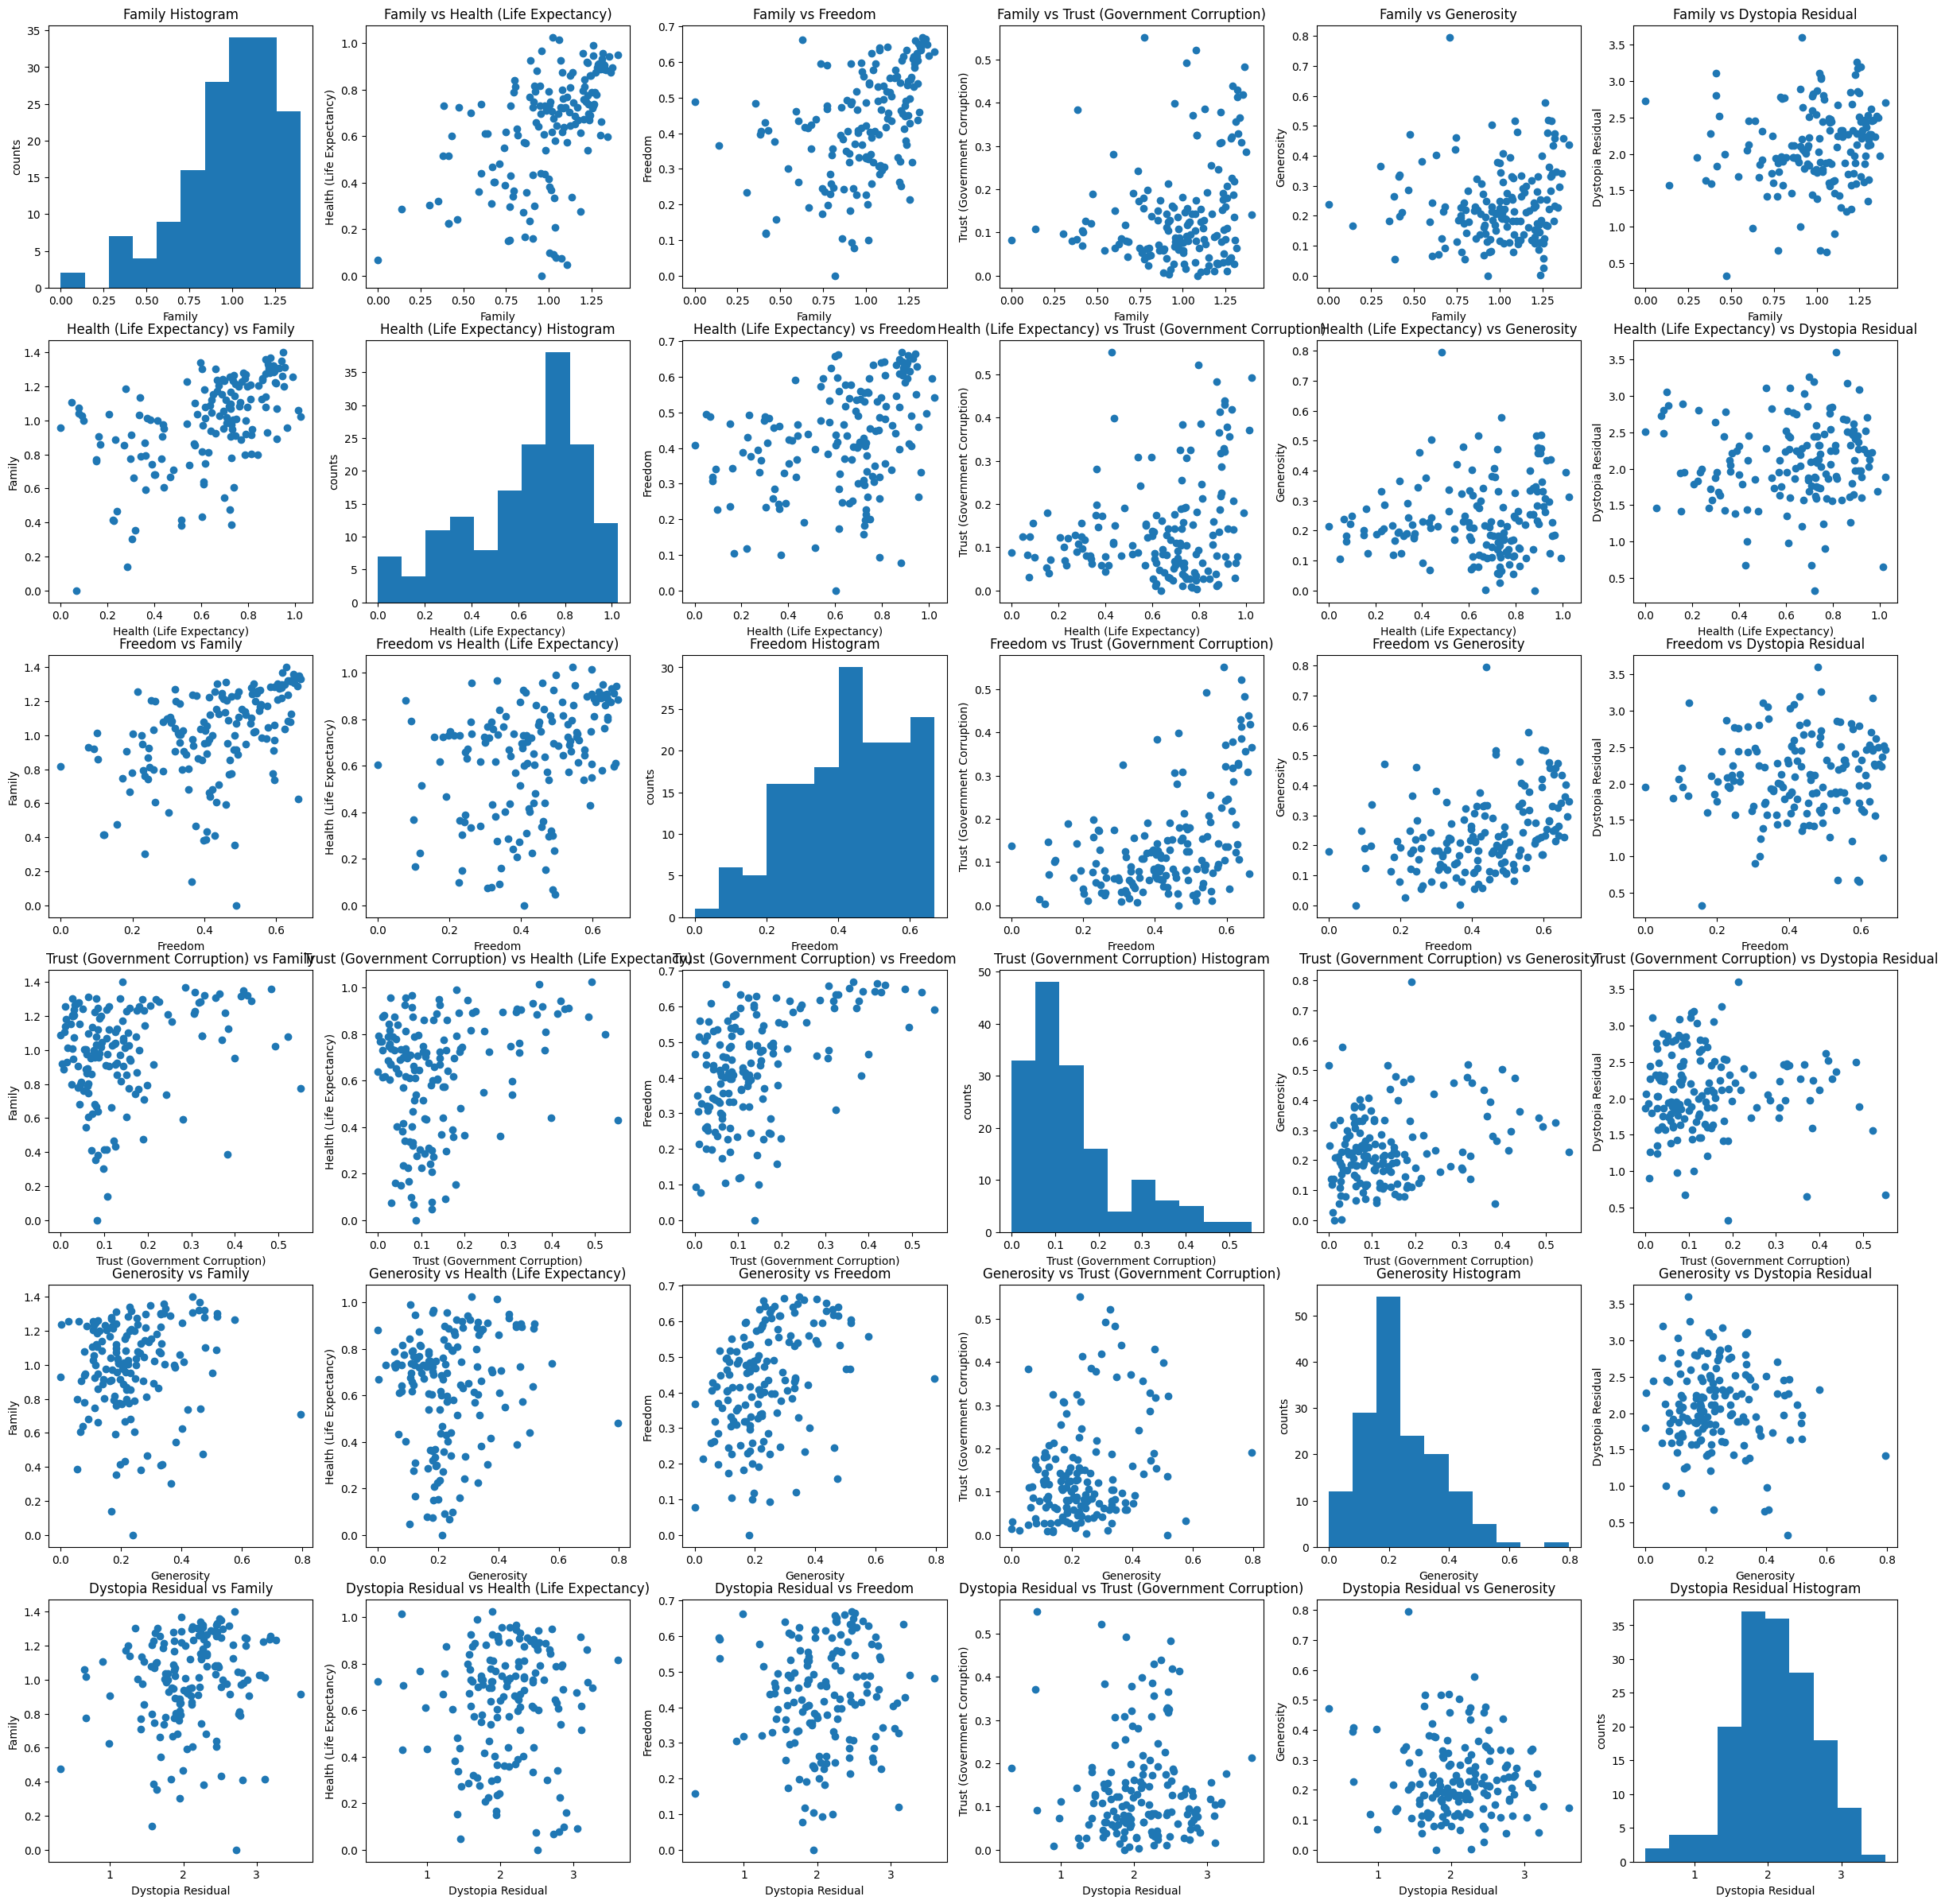

In [40]:
plt.figure(figsize=(30, 30))
categories = ["Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]
i=0
for category in categories:
  for category2 in categories:
    plt.subplot(6,6,i+1)
    if category == category2:
      plt.hist(happy_ds[category])
      plt.xlabel(category)
      plt.ylabel("Counts")
      plt.title(f"{category} Distribution")
    else:
      plt.scatter(happy_ds[category], happy_ds[category2])
      plt.xlabel(category)
      plt.ylabel(category2)
      plt.title(f"{category} vs {category2}")
    i+=1
plt.show()

Figure 1: Graph matrix of six different parameters (family, health, freedom, trust, generosity, and dystopia) from a 2015 world happiness dataset, compared against one another. Along the diagonal shows the distribution of the values from within the dataset. There is no clear linear correlation between any two parameters, which suggests that countries that may do well in one area could do poorly in another and that there is a lot of nuance within all of the values.

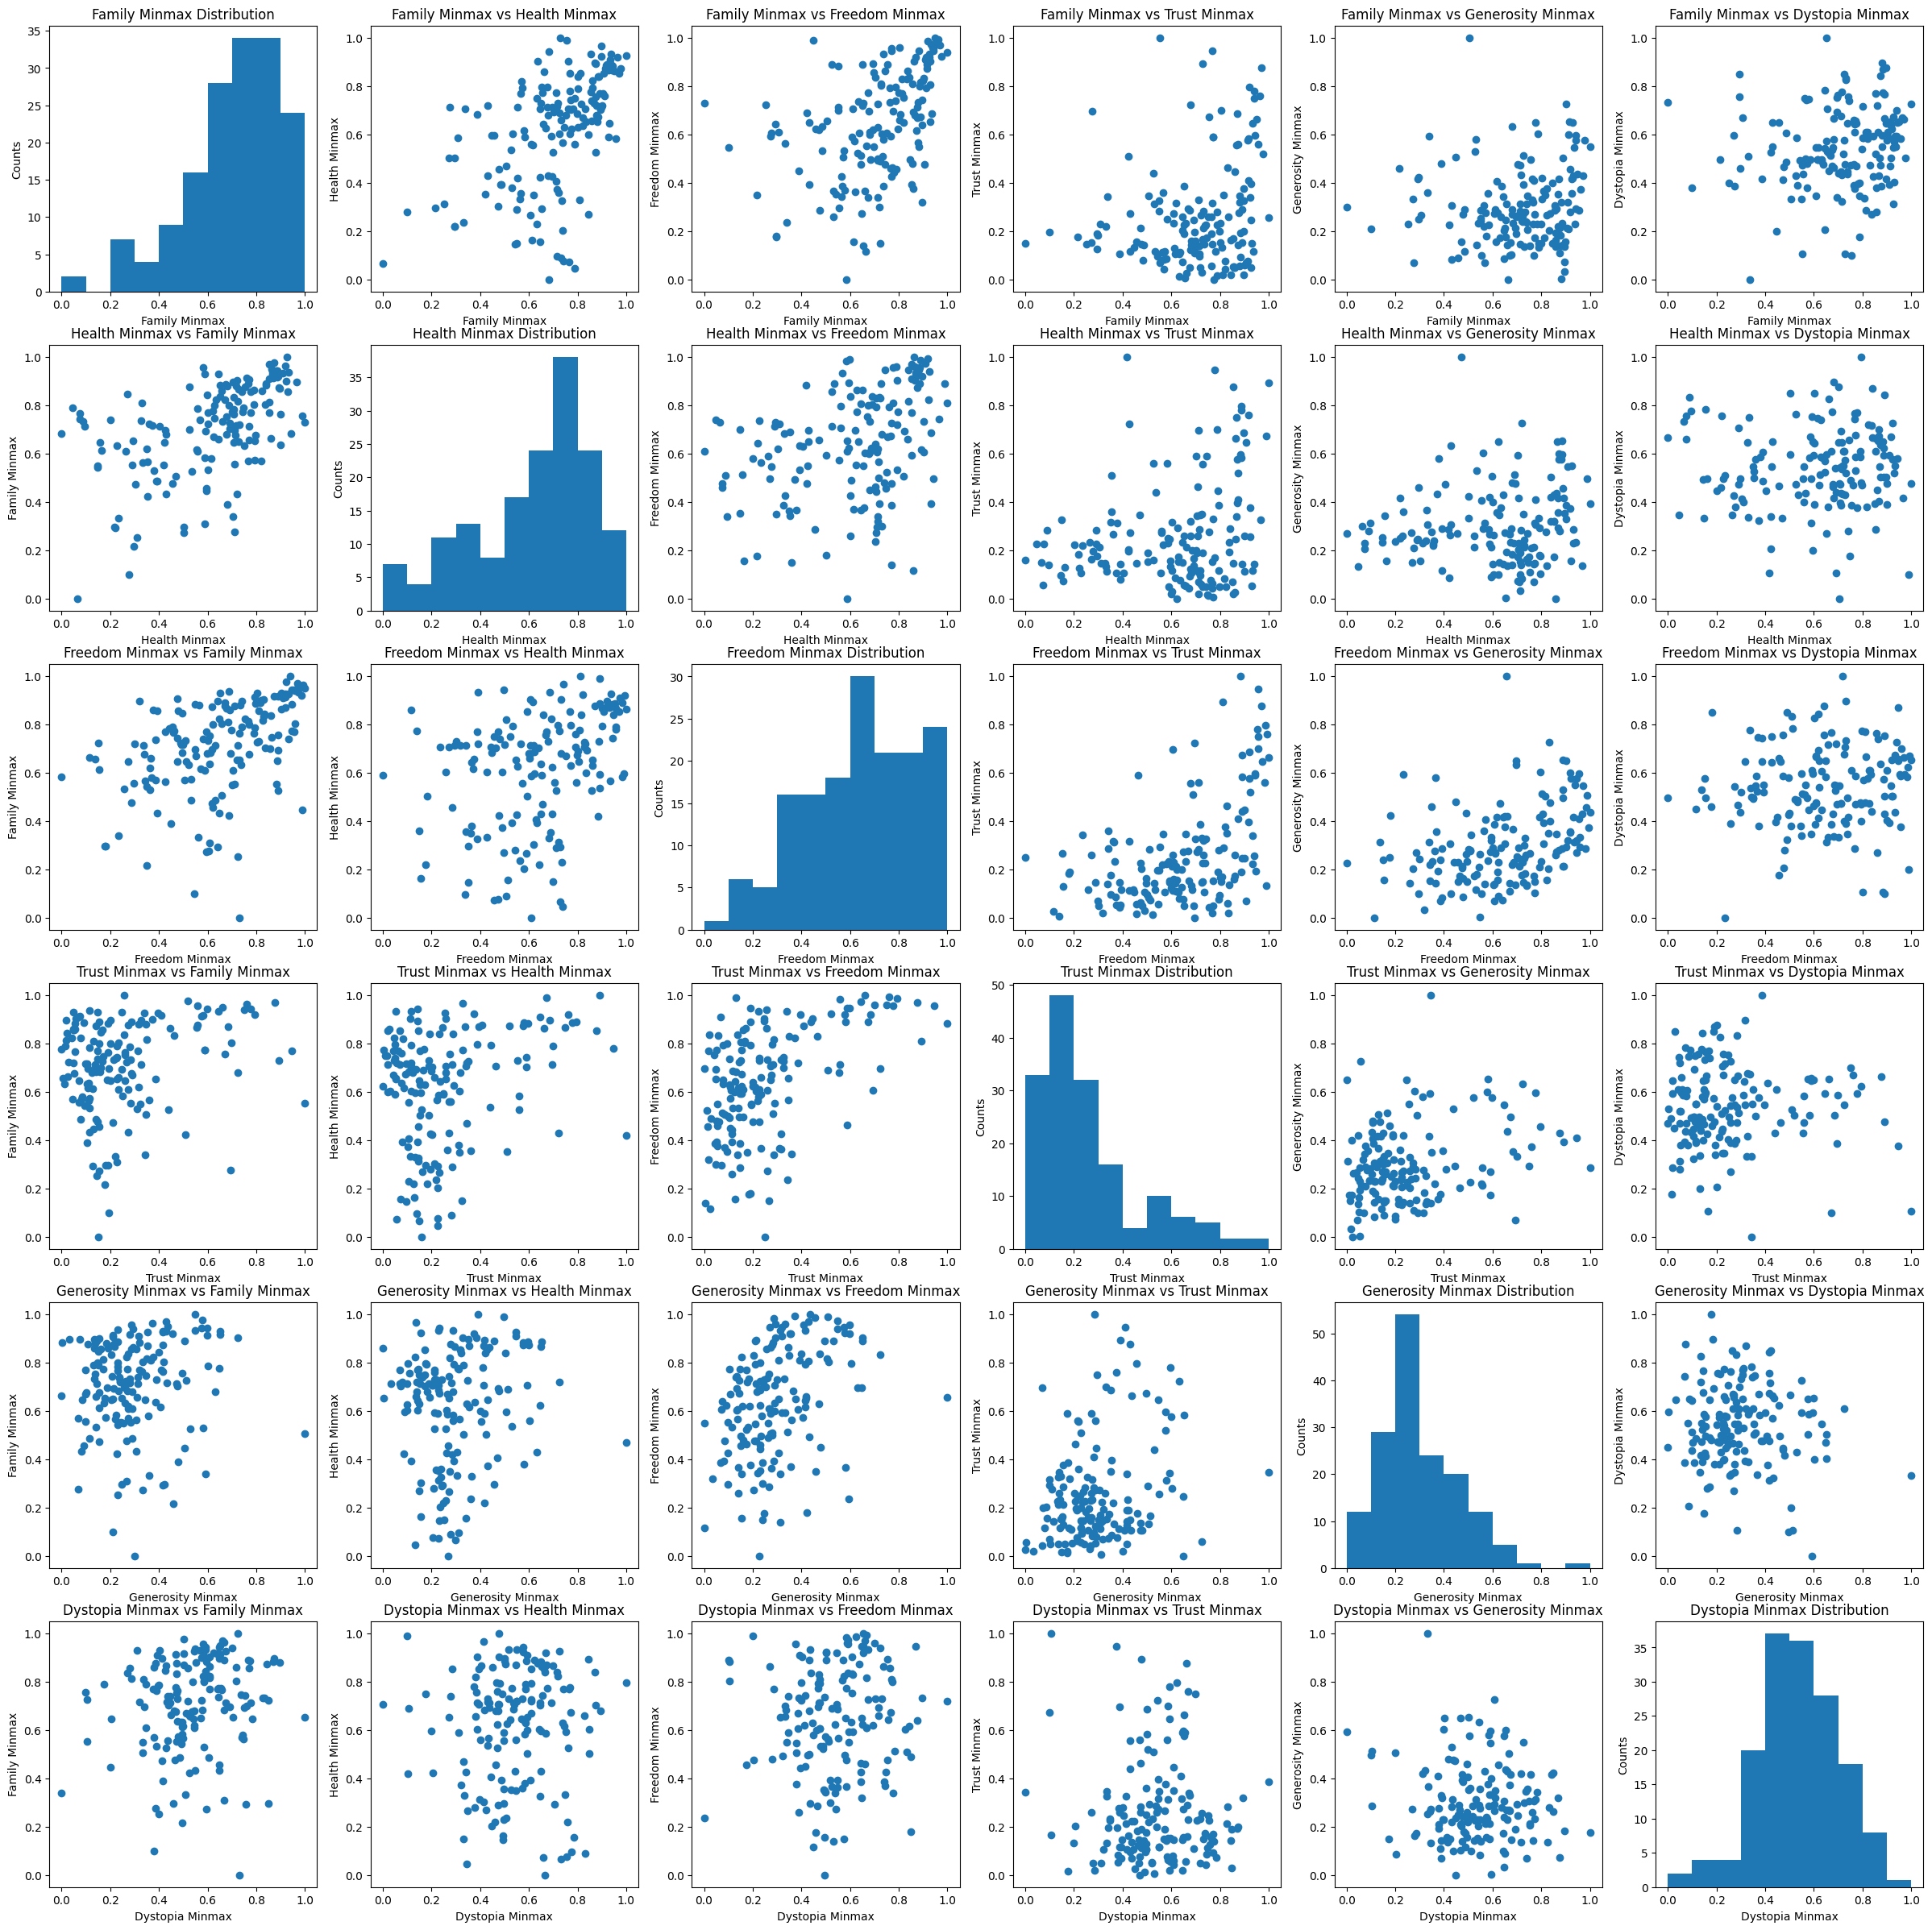

In [41]:
plt.figure(figsize=(30, 30))
categories = ["Family Minmax","Health Minmax","Freedom Minmax","Trust Minmax","Generosity Minmax","Dystopia Minmax"]
i=0
for category in categories:
  for category2 in categories:
    plt.subplot(6,6,i+1)
    if category == category2:
      plt.hist(happy_ds[category])
      plt.xlabel(category)
      plt.ylabel("Counts")
      plt.title(f"{category} Distribution")
    else:
      plt.scatter(happy_ds[category], happy_ds[category2])
      plt.xlabel(category)
      plt.ylabel(category2)
      plt.title(f"{category} vs {category2}")
    i+=1
plt.show()

Figure 2: Scaled version of figure 1, using minmax scaling. The scatterplots and histograms are the exact same, showing that minmax scaling does not impact comparison between two variables, it just makes the data a bit easier to understand.

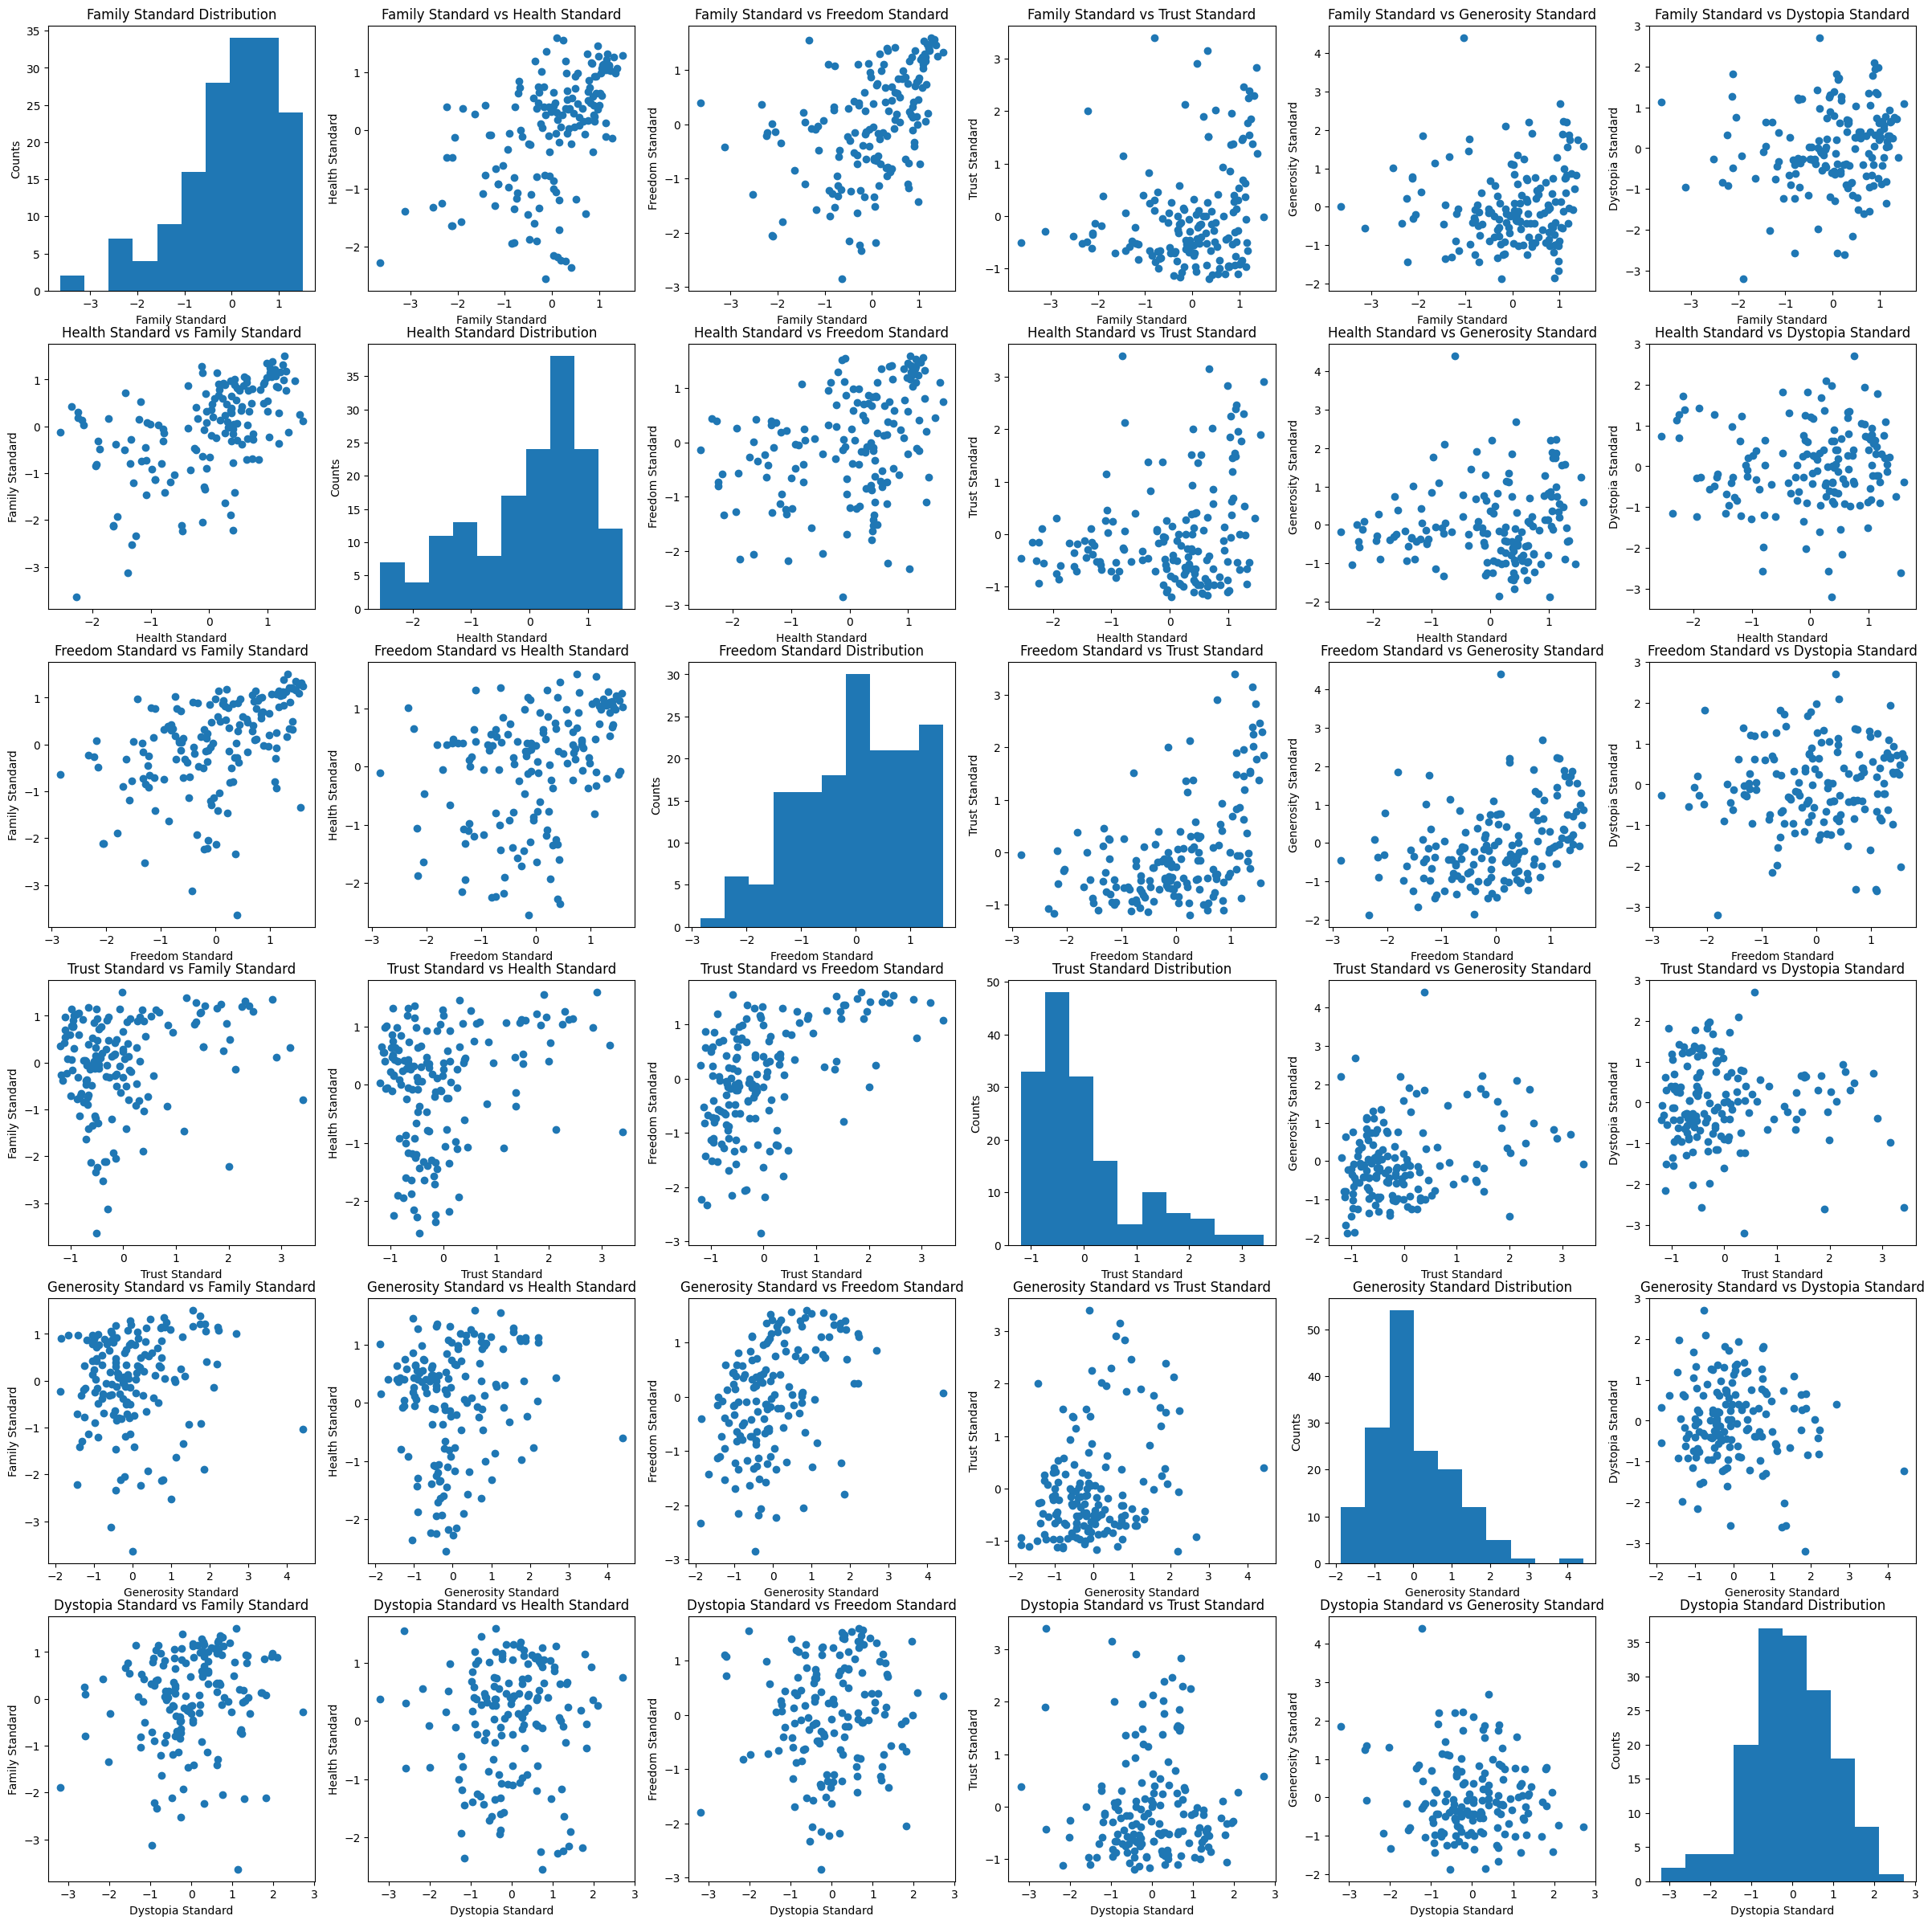

In [42]:
plt.figure(figsize=(30, 30))
categories = ["Family Standard","Health Standard","Freedom Standard","Trust Standard","Generosity Standard","Dystopia Standard"]
i=0
for category in categories:
  for category2 in categories:
    plt.subplot(6,6,i+1)
    if category == category2:
      plt.hist(happy_ds[category])
      plt.xlabel(category)
      plt.ylabel("Counts")
      plt.title(f"{category} Distribution")
    else:
      plt.scatter(happy_ds[category], happy_ds[category2])
      plt.xlabel(category)
      plt.ylabel(category2)
      plt.title(f"{category} vs {category2}")
    i+=1
plt.show()

Figure 3: Scaled version of figure 1, using a standardized scaling. The scatterplots and histograms are again the exact same, showing that scaling in general does not impact how two variables relate to one another, but it can make the data easier to digest, with a scaling that makes the most sense to the dataset its being applied on.

>Task 5: Using KMeans clustering, cluster the scaled numerical features (choose either scaling) that are used to calculate the score: 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' into 3 clusters

In [27]:
import sklearn as skl
from sklearn import cluster

In [28]:
km = skl.cluster.KMeans(n_clusters=3, random_state=661)
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'auto',
 'random_state': 661,
 'tol': 0.0001,
 'verbose': 0}

In [29]:
km.fit(happy_ds[["Family Minmax", "Health Minmax", "Freedom Minmax", "Trust Minmax", "Generosity Minmax", "Dystopia Minmax"]])

KMeans(n_clusters=3, random_state=661)

In [30]:
km.inertia_

21.847978608062185

In [31]:
km.labels_.shape

(158,)

In [32]:
km.cluster_centers_

array([[0.84573412, 0.77820288, 0.89370082, 0.51829238, 0.42391535,
        0.52145134],
       [0.75306662, 0.72623135, 0.59559347, 0.14717585, 0.22817874,
        0.56969446],
       [0.52811797, 0.32429402, 0.4953699 , 0.20758708, 0.2940311 ,
        0.5159614 ]])

>Task 6: Make a scatter plot with the cluster (0, 1, or 2) on the X axis, and the Happiness score with its errorbar on the Y axis and, as usual, comment on the figure your what, how, wow

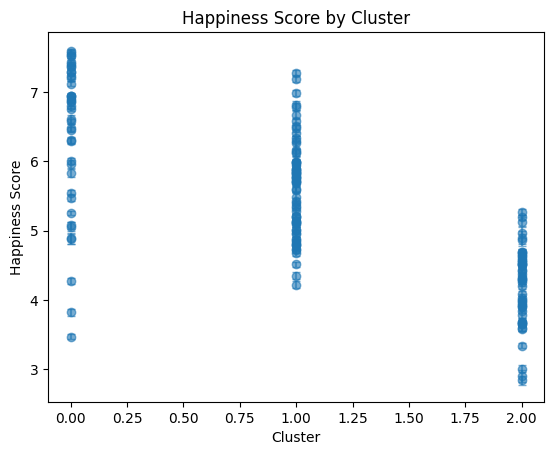

In [33]:
plt.errorbar(km.labels_, happy_ds["Happiness Score"], yerr=happy_ds["Standard Error"], fmt='o', capsize=3, alpha=0.6)
plt.xlabel("Cluster")
plt.ylabel("Happiness Score")
plt.title("Happiness Score by Cluster")
plt.show()

Figure 4: Scatterplot of happiness score seperated by cluster, including error bars. No errors were substantial to influence the distribution. No major conclusions can be easily drawn from this display of the data.

> FBianco: "If you make a box and whiskers plot it may be more obvious"

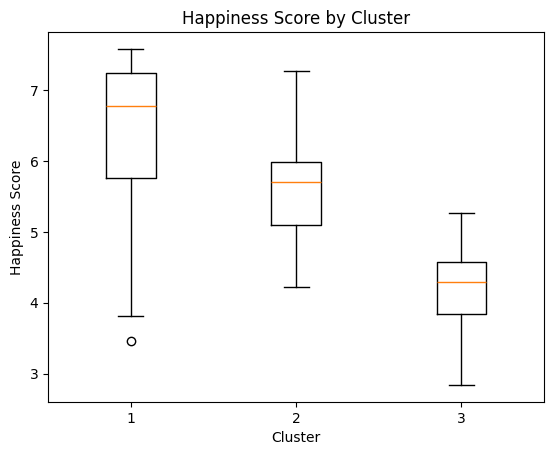

In [37]:
happiness_by_cluster = [happy_ds["Happiness Score"][km.labels_ == i] for i in range(km.n_clusters)]

plt.boxplot(happiness_by_cluster)
plt.xlabel("Cluster")
plt.ylabel("Happiness Score")
plt.title("Happiness Score by Cluster")
plt.show()

Figure 5: A box and whisker plot version of figure 4. Here, it is more obvious that while there are some differences between the median and variance of the happiness score within the clusters, there is enough overlap to show that the clusters are not highlighting different parts of the happiness score and that there is a lot more nuance in the calculation of the score.

>Task 7: Repeat for 2, 3, 4, 5 , 6, 7 and make a plot of KMeans intracluster variance vs the number of clusters (respectively Y and X) and discuss if this plots allows for a robust selection of the correct number of clusters code that does clustering

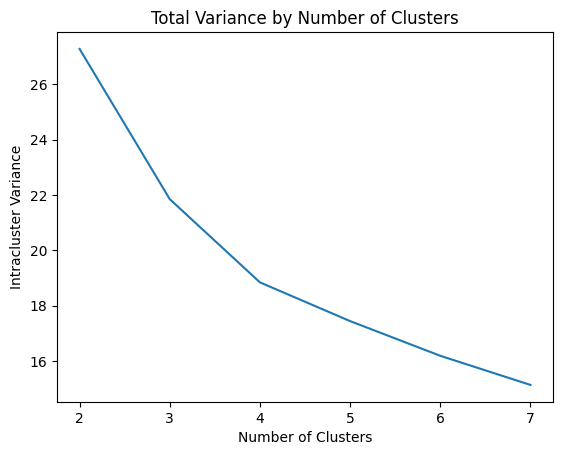

In [43]:
tv = []
for i in range(2,8):
  km = skl.cluster.KMeans(n_clusters=i, random_state=661).fit(happy_ds[["Family Minmax", "Health Minmax", "Freedom Minmax", "Trust Minmax", "Generosity Minmax", "Dystopia Minmax"]])
  tv.append(km.inertia_)
plt.plot(range(2,8), tv)
plt.xlabel("Number of Clusters")
plt.ylabel("Intracluster Variance")
plt.title("Total Variance by Number of Clusters")
plt.show()

Figure 6: Intracluster variance as a function of cluster number using KMeans, aka an elbow plot. While the variance does decrease as cluster size increases, it looks almost exponential in that there is diminishing returns to the variance by adding more clusters. It is not clear that there is a best number of clusters to use with this dataset due to the improving but diminishing returns by increasing cluster number.